In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import display

df = pd.read_csv("datos_tratados.csv")
columnas_a_eliminar = ["customerID"]
df = df.drop(columns=columnas_a_eliminar)
categoricas = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categoricas, drop_first=True)

objetivo = [col for col in df.columns if "Churn" in col][0]
X = df.drop(objetivo, axis=1)
y = df[objetivo]

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
display(df.head())


(5086, 30) (2181, 30) (5086,) (2181,)


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [60]:
categoricas = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categoricas, drop_first=True)
display(df.head())

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [61]:
proporcion = y.value_counts(normalize=True) * 100
proporcion = proporcion.round(2)
proporcion_df = pd.DataFrame({'Churn': proporcion.index, 'Porcentaje': proporcion.values})
proporcion_df['Porcentaje'] = proporcion_df['Porcentaje'].astype(str) + '%'
display(proporcion_df)


,Churn,Porcentaje
0,False,74.28%
1,True,25.72%


In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(X_res.shape, y_res.shape)


(7556, 30) (7556,)


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)


print("Datos de entrenamiento y prueba escalados")


Datos de entrenamiento y prueba escalados


ANALISIS DE CORRELACION


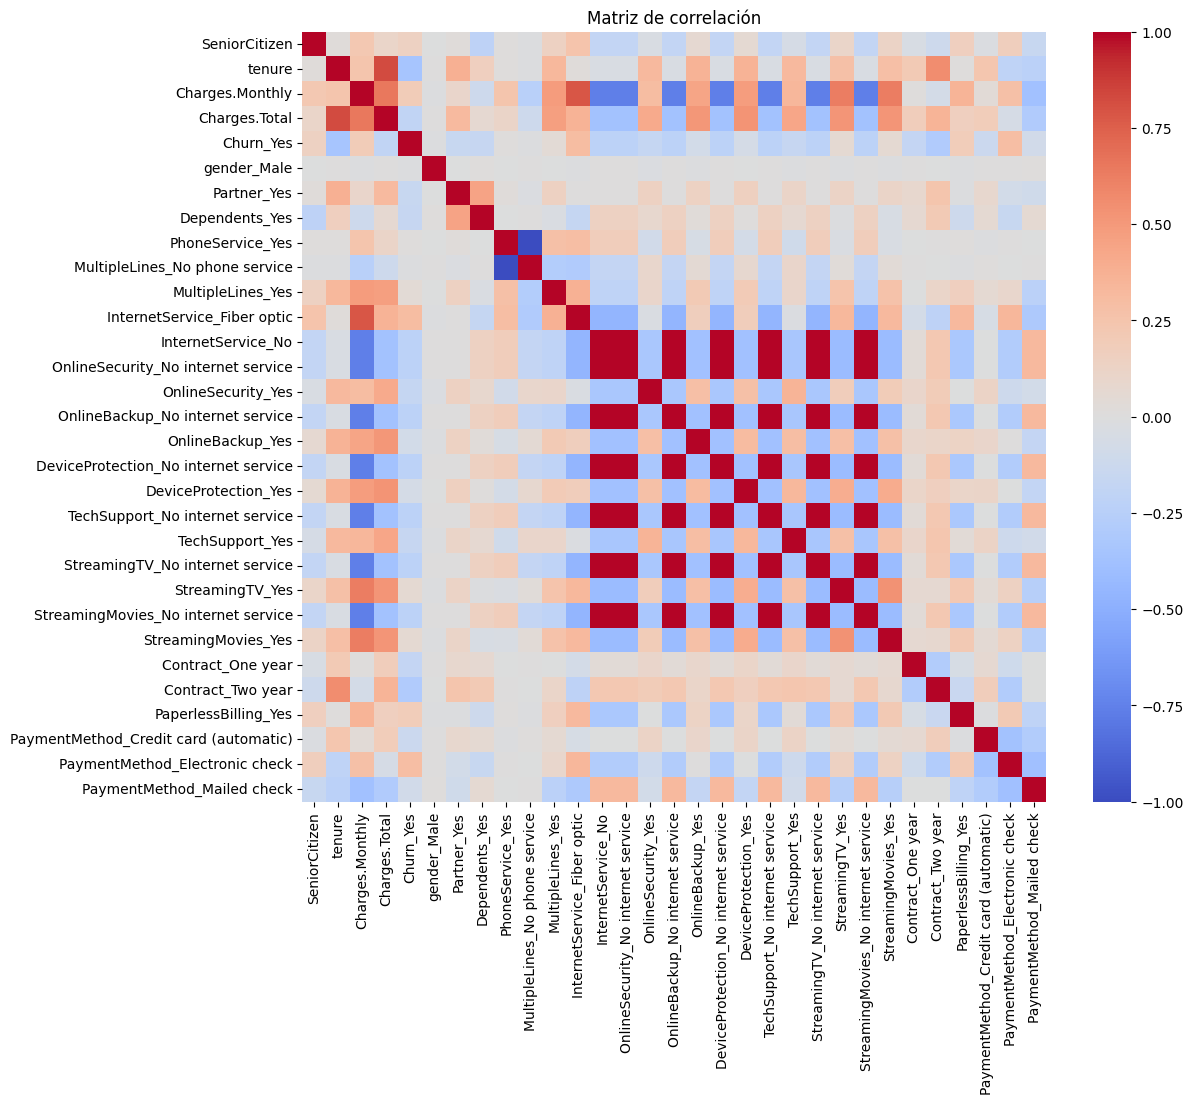

,Churn_Yes
Churn_Yes,1.000000
InternetService_Fiber optic,0.300949
PaymentMethod_Electronic check,0.294626
Charges.Monthly,0.189866
PaperlessBilling_Yes,0.186666
SeniorCitizen,0.146733
StreamingTV_Yes,0.062430
StreamingMovies_Yes,0.060586
MultipleLines_Yes,0.039343
PhoneService_Yes,0.012571


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

corr_target = corr[objetivo].sort_values(ascending=False)
display(corr_target)


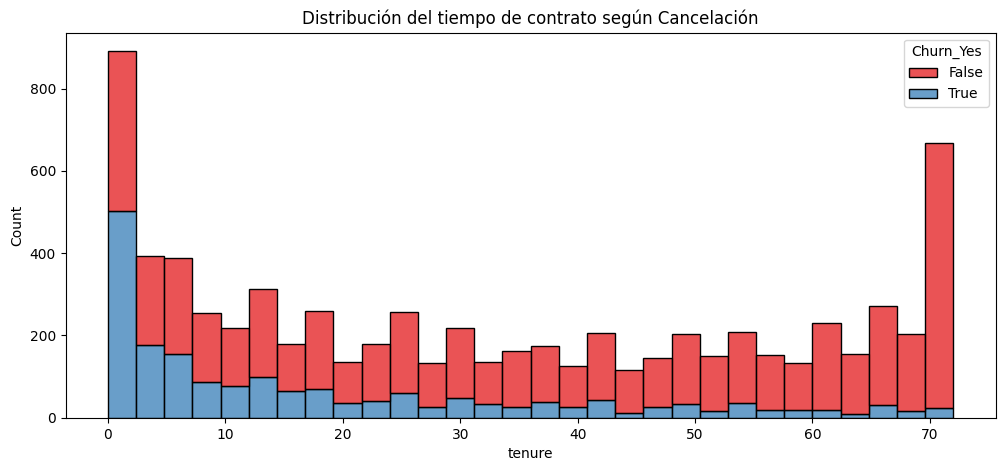

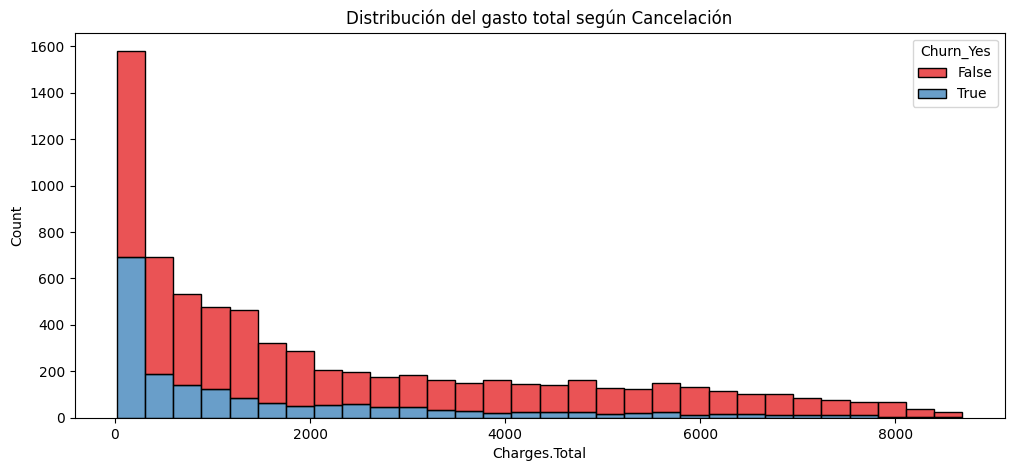

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.histplot(data=df, x='tenure', hue=objetivo, multiple='stack', bins=30, palette="Set1")
plt.title("Distribución del tiempo de contrato según Cancelación")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=df, x='Charges.Total', hue=objetivo, multiple='stack', bins=30, palette="Set1")
plt.title("Distribución del gasto total según Cancelación")
plt.show()



SEPARACION DE DATOS

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5086, 30) (2181, 30) (5086,) (2181,)


CREACION DE MODELOS

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

log_model.fit(X_res_scaled, y_res)
rf_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test)
log_prob = log_model.predict_proba(X_test_scaled)[:,1]




EVALUACION DE MODELOS

Regresión Logística: Acc: 0.7744154057771664 Prec: 0.5536547433903577 Recall: 0.6345811051693404 F1: 0.5913621262458472
Random Forest: Acc: 0.7858780375974324 Prec: 0.6140776699029126 Recall: 0.45098039215686275 F1: 0.5200411099691675


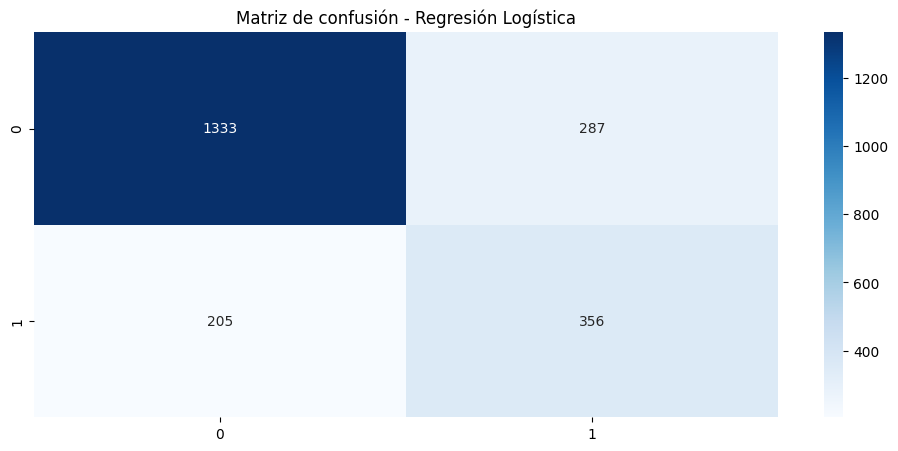

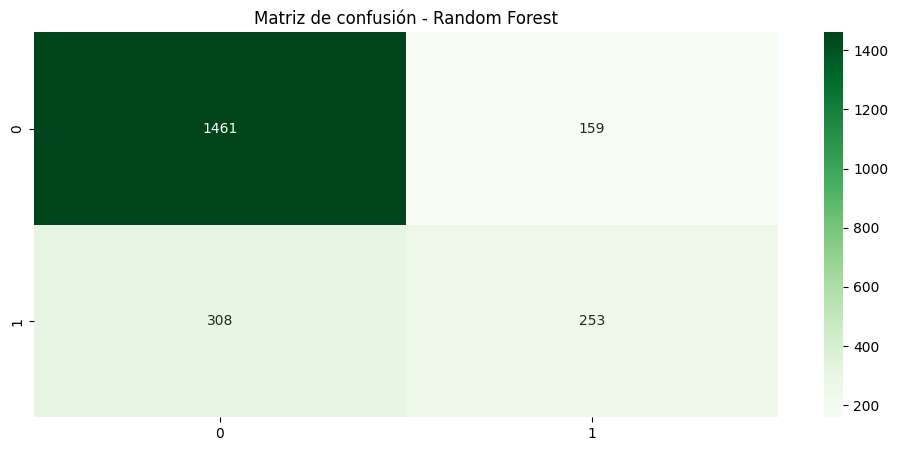

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas Regresión Logística
acc_log = accuracy_score(y_test, log_pred)
prec_log = precision_score(y_test, log_pred)
rec_log = recall_score(y_test, log_pred)
f1_log = f1_score(y_test, log_pred)
cm_log = confusion_matrix(y_test, log_pred)

# Métricas Random Forest
acc_rf = accuracy_score(y_test, rf_pred)
prec_rf = precision_score(y_test, rf_pred)
rec_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)
cm_rf = confusion_matrix(y_test, rf_pred)

print("Regresión Logística: Acc:", acc_log, "Prec:", prec_log, "Recall:", rec_log, "F1:", f1_log)
print("Random Forest: Acc:", acc_rf, "Prec:", prec_rf, "Recall:", rec_rf, "F1:", f1_rf)

plt.figure(figsize=(12,5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

plt.figure(figsize=(12,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens")
plt.title("Matriz de confusión - Random Forest")
plt.show()


COMPARACION DE MODELOS

In [81]:
metrics = {
    "Regresión Logística": {"Accuracy": acc_log, "Precision": prec_log, "Recall": rec_log, "F1": f1_log},
    "Random Forest": {"Accuracy": acc_rf, "Precision": prec_rf, "Recall": rec_rf, "F1": f1_rf}
}

metrics_df = pd.DataFrame(metrics).T
display(metrics_df)

best_model = metrics_df['F1'].idxmax()
print("El mejor modelo según F1-score es:", best_model)

if metrics_df.loc[best_model, 'Recall'] < 0.7:
    print("Cuidado: Puede estar subestimando los clientes que cancelan (underfitting en la clase minoritaria).")
elif metrics_df.loc[best_model, 'Accuracy'] - metrics_df.loc[best_model, 'F1'] > 0.1:
    print("Atención: Puede haber overfitting (accuracy muy alta pero F1 menor).")
else:
    print("El modelo parece balanceado entre precisión y recall.")


,Accuracy,Precision,Recall,F1
Regresión Logística,0.774415,0.553655,0.634581,0.591362
Random Forest,0.785878,0.614078,0.450980,0.520041


El mejor modelo según F1-score es: Regresión Logística
Cuidado: Puede estar subestimando los clientes que cancelan (underfitting en la clase minoritaria).


ANALISIS DE LA IMPORTANCIA DE LAS VARIABLES

In [82]:
import pandas as pd

# Variables más importantes según Regresión Logística
log_coef = pd.DataFrame({
    "Variable": X_res.columns,
    "Coeficiente": log_model.coef_[0]
}).sort_values(by="Coeficiente", key=abs, ascending=False)
display(log_coef.head(10))

# Variables más importantes según Random Forest
rf_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)
display(rf_importance.head(10))


,Variable,Coeficiente
2,Charges.Monthly,-8.495205
10,InternetService_Fiber optic,4.029219
7,PhoneService_Yes,2.882846
1,tenure,-2.213151
8,MultipleLines_No phone service,1.668136
23,StreamingMovies_Yes,1.544967
21,StreamingTV_Yes,1.466810
3,Charges.Total,1.339197
9,MultipleLines_Yes,0.903042
17,DeviceProtection_Yes,0.726017


,Variable,Importancia
3,Charges.Total,0.173759
1,tenure,0.162206
2,Charges.Monthly,0.157203
25,Contract_Two year,0.055241
28,PaymentMethod_Electronic check,0.038523
10,InternetService_Fiber optic,0.037749
24,Contract_One year,0.027300
13,OnlineSecurity_Yes,0.027113
4,gender_Male,0.027072
19,TechSupport_Yes,0.025601


CONCLUSION

In [84]:
factores_log = log_coef.head(5)
factores_rf = rf_importance.head(5)

print("Principales factores según Regresión Logística:")
display(factores_log)

print("\nPrincipales factores según Random Forest:")
display(factores_rf)




Principales factores según Regresión Logística:


,Variable,Coeficiente
2,Charges.Monthly,-8.495205
10,InternetService_Fiber optic,4.029219
7,PhoneService_Yes,2.882846
1,tenure,-2.213151
8,MultipleLines_No phone service,1.668136



Principales factores según Random Forest:


,Variable,Importancia
3,Charges.Total,0.173759
1,tenure,0.162206
2,Charges.Monthly,0.157203
25,Contract_Two year,0.055241
28,PaymentMethod_Electronic check,0.038523



***Análisis y Estrategias de Retención:***

1. Tiempo de contrato (tenure): Clientes con menor tiempo de permanencia tienen mayor riesgo de cancelación. Estrategia: ofrecer incentivos a clientes nuevos para fidelización temprana.

2. Gasto total (Charges.Total): Clientes con gastos más altos tienden a cancelar más frecuentemente. Estrategia: crear planes personalizados y beneficios para clientes de alto gasto.

3. Tipo de contrato (Contract_One year / Two year): Contratos más cortos se asocian a mayor cancelación. Estrategia: promocionar contratos anuales con descuentos o beneficios adicionales.

4. Servicios adicionales (Streaming, Internet, etc.): La ausencia de ciertos servicios aumenta la probabilidad de churn. Estrategia: ofrecer paquetes combinados atractivos y promociones.

5. Facturación sin papel (PaperlessBilling_Yes): Puede indicar clientes jóvenes o digitales, más propensos a cancelar. Estrategia: campañas de comunicación digital y programas de lealtad.

Conclusión FINAL: Combinando insights de ambos modelos, se pueden priorizar acciones de retención focalizadas en clientes con mayor riesgo, basándose en tenure, gasto total y tipo de contrato.
